##GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [1]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jannie/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [17]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [2]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split thedata by male and female, load the data into 2 disctionary. 
#08_2 files are male, 08_3 are female
#1:All race, 4:White, 6:Black, 9:Hispanic, 8:Asian

allmales={}
allfemales={}

allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

##exploratory phase

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

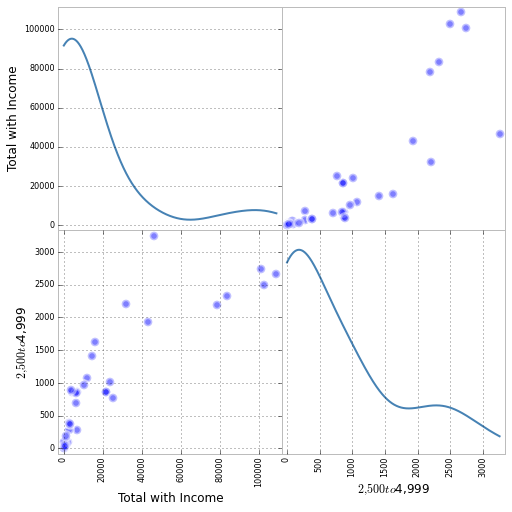

In [3]:
#lest see what is in the data
from pandas.tools.plotting import scatter_matrix
scatter_matrix(allmales['all'][[u'Total with Income',
                                u'$2,500 to $4,999',u'Median income',u'Gini ratio']], 
               figsize=(8,8), linewidth= 3, s=300, diagonal='kde')

#like for the building homework: this fails cause the data is not parsed and formatted propoerly
#so maybe just print the columns to find out
print allmales['all'].columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bdb832090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3be4b6ee50>]], dtype=object)

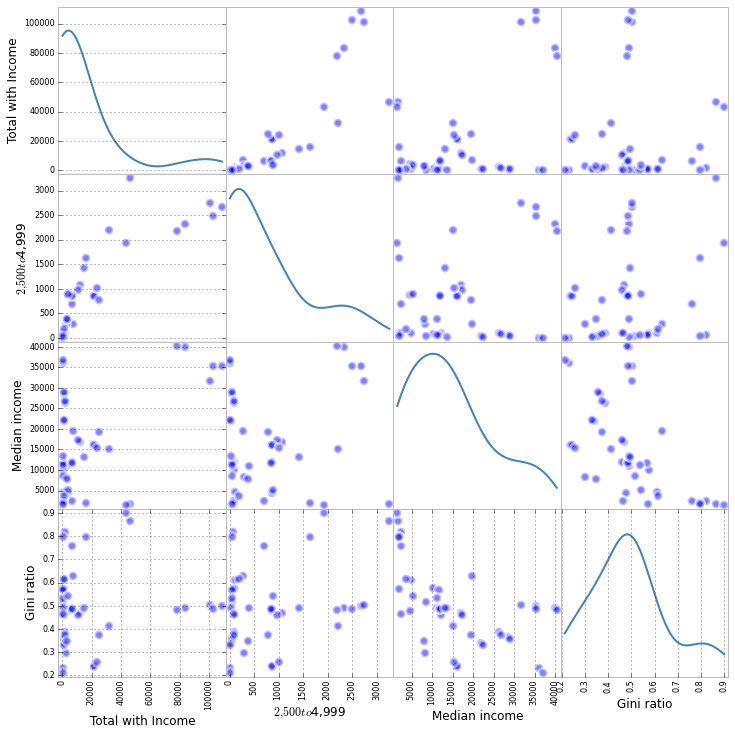

In [17]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

#print  allmales['all'][u'Characteristic']
scatter_matrix(allmales['all'][[u'Total with Income',
                                u'$2,500 to $4,999',u'Median income',u'Gini ratio']], 
               figsize=(12,12), linewidth= 3, s=300, diagonal='kde')


now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot

###Tried again, the first attempt failed to draw median income and gini ratio because the dataset has NaN values. After dropping these values, the second attempt gave the correlations

In [7]:
#do the same for females

for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)


##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

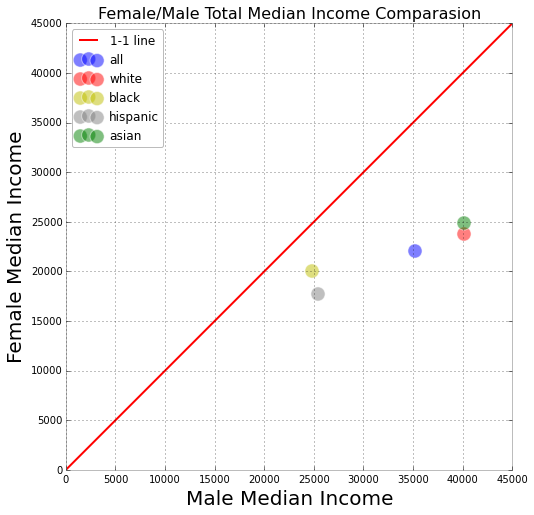

In [16]:
#print allfemales['all']['Median income'][1]
#first raw is the total

pl.figure(figsize=(8,8))
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], s=200, alpha=0.5, label='all')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], s=200, c='r', alpha=0.5, label='white')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], s=200,c='y', alpha=0.5, label='black')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], s=200,c='grey', alpha=0.5, label='hispanic')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], s=200,c='g', alpha=0.5,label='asian')
pl.plot([0,45000],[0,45000],c='r', label='1-1 line')
pl.xlim(0, 45000)
pl.ylim(0, 45000)
pl.xlabel('Male Median Income', size=20)
pl.ylabel('Female Median Income', size=20)
pl.title('Female/Male Total Median Income Comparasion',size=16)
pl.legend(loc=2)

#Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

   female_median  male_median
0              0            0
1          22063        35228
2          23780        40122
3          20044        24855
4          17762        25411
5          24840        40153
male_median [0.0, 35228.0, 40122.0, 24855.0, 25411.0, 40153.0]
female_median [0.0, 22063.0, 23780.0, 20044.0, 17762.0, 24840.0]
 
Slope of OLS model 0.59
Slope of numpy model 0.59


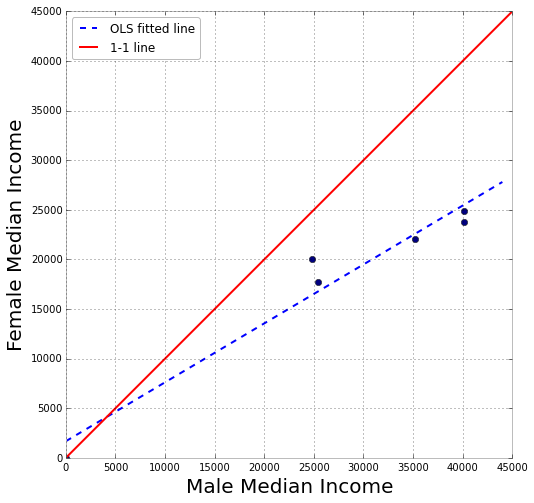

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#professor added 0 as the first point
male_median=[0., allmales['all']['Median income'][1],allmales['white']['Median income'][1],allmales['black']['Median income'][1],allmales['hispanic']['Median income'][1],allmales['asian']['Median income'][1]]
female_median=[0., allfemales['all']['Median income'][1],allfemales['white']['Median income'][1],allfemales['black']['Median income'][1],allfemales['hispanic']['Median income'][1],allfemales['asian']['Median income'][1]]

#My original setting:
#male_median=[allmales['all']['Median income'][1],allmales['white']['Median income'][1],allmales['black']['Median income'][1],allmales['hispanic']['Median income'][1],allmales['asian']['Median income'][1]]
#female_median=[allfemales['all']['Median income'][1],allfemales['white']['Median income'][1],allfemales['black']['Median income'][1],allfemales['hispanic']['Median income'][1],allfemales['asian']['Median income'][1]]

df=pd.DataFrame({'male_median':male_median,'female_median':female_median})
print df

#Method 1:SMF.OLS
x = np.array(all_males)
y = np.array(all_females)

model = smf.ols('y ~ x', data=df, missing='drop').fit()
pl.figure(figsize=(8,8))
pl.plot(x, y,'o',color='navy')
plot(range(0,45000,1000),model.params[1]*np.arange(0,45000,1000) + model.params[0],'b--', label='OLS fitted line')
pl.plot([0,45000],[0,45000],c='r', label='1-1 line')
pl.xlim(0, 45000)
pl.ylim(0, 45000)
pl.xlabel('Male Median Income', size=20)
pl.ylabel('Female Median Income', size=20)
pl.legend(loc=2)

print 'male_median', male_median
print 'female_median', female_median
print ' '
print 'Slope of OLS model {0:.2f}'.format(model.params[1])
#print model.summary()

#Method 2: Fit with NUMPY
m,b = np.polyfit(all_males, all_females, 1) 
print 'Slope of numpy model {0:.2f}'.format(m)


##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [36]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
from scipy import stats

medianmales=np.array(male_median)
medianfemales=np.array(female_median)
cor = stats.spearmanr(medianmales, medianfemales)
print cor, medianmales.std()/medianfemales.std()
beta1=cor[0]*medianfemales.std()/medianmales.std()
beta0=medianfemales.mean()-beta1*medianmales.mean()
print 'Slope of ANalytical Best Regression model:', beta1

(0.94285714285714284, 0.004804664723032071) 1.64275625296
Slope of ANalytical Best Regression model: 0.573948290354


##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

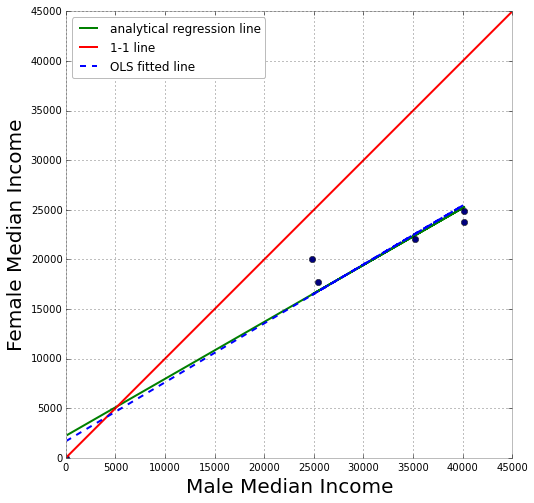

In [39]:
pl.figure(figsize=(8,8))
x=medianmales
y=medianfemales
pl.plot(x,beta1*x+beta0,'g', label='analytical regression line')
pl.plot(x, y,'o',color='navy')
pl.plot([0,45000],[0,45000],c='r', label='1-1 line')
plot(x,model.predict(),'b--', label='OLS fitted line')
#pl.plot([0,45000],[0,45000],'k--',c='r', label='1-1 line')
pl.xlim(0, 45000)
pl.ylim(0, 45000)
pl.xlabel('Male Median Income', size=20)
pl.ylabel('Female Median Income', size=20)
pl.legend(loc=2)

#this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [46]:
###Create a mask
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())
#I am gonna create the mask in the next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

femalesfinal=all_females[all_females.mask==False]
malesfinal=all_males[all_males.mask==False]
print len(femalesfinal), len(all_females)
print ' '
print femalesfinal
#print malesfinal

178 245
 
[22063.0 27736.0 28402.0 10732.0 1635.0 11686.0 7950.0 2569.0 12501.0
 8067.0 8832.0 3854.0 3210.0 1611.0 1406.0 1864.0 2428.0 10489.0 6769.0
 18035.0 11138.0 17295.0 13271.0 4974.0 10183.0 6800.0 10918.0 6368.0
 23451.0 15194.0 18687.0 13418.0 3965.0 3849.0 4878.0 4030.0 1991.0 21159.0
 22794.0 11702.0 12870.0 10908.0 6321.0 11110.0 8438.0 23780.0 30626.0
 30919.0 10328.0 1645.0 12038.0 7812.0 2205.0 12827.0 8195.0 9496.0 4005.0
 3407.0 1650.0 1420.0 1899.0 2491.0 10286.0 6441.0 17934.0 10843.0 17748.0
 13366.0 4648.0 10013.0 6732.0 10426.0 5921.0 23354.0 14612.0 18777.0
 13563.0 3522.0 4255.0 4885.0 4512.0 1938.0 21500.0 23998.0 12055.0 13451.0
 11848.0 6517.0 11755.0 8927.0 20044.0 25971.0 26165.0 10313.0 1630.0
 11079.0 8089.0 3015.0 10330.0 7635.0 3550.0 2027.0 1454.0 1358.0 1710.0
 1958.0 12387.0 8733.0 27664.0 17010.0 13832.0 8620.0 28727.0 18497.0
 5065.0 2918.0 20618.0 21762.0 11096.0 12010.0 9174.0 6308.0 9668.0 8024.0
 17762.0 21261.0 21411.0 11020.0 9649.0 8154.0 

0.609020523617 1493.03944114


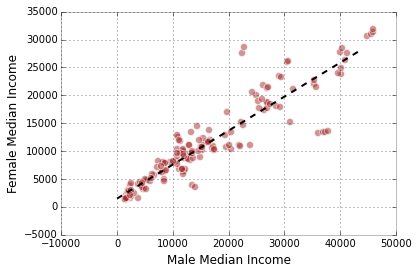

In [53]:
m,b = np.polyfit(malesfinal, femalesfinal, 1) 
print m,b
pl.scatter(all_males, all_females, s=50, alpha=0.5, c='brown')
pl.plot(range(0,45000,1000),b+m*np.arange(0,45000,1000),'k--', lw = 2, label="polyfit regression")
pl.xlabel('Male Median Income', size=12)
pl.ylabel('Female Median Income', size=12)

In [40]:
#is the line fit similar? can you find any high legverage points?

[  1674.6926881   22594.61165909  25500.88176934  16434.67298854
  16764.84997695  25519.29091798]


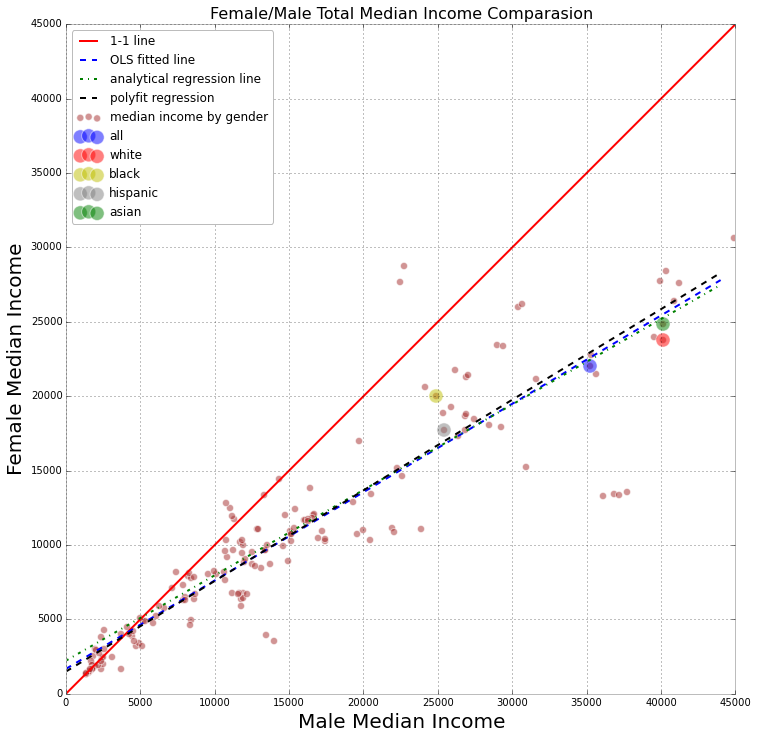

In [54]:
pl.figure(figsize=(12,12))
print model.predict()

pl.plot([0,45000],[0,45000],c='r', label='1-1 line')
plot(range(0,45000,1000),model.params[1]*np.arange(0,45000,1000) + model.params[0],'b--', label='OLS fitted line')
pl.plot(range(0,45000,1000),beta1*np.arange(0,45000,1000)+beta0,'g-.', label='analytical regression line')
pl.scatter(all_males, all_females, s=50, alpha=0.5, c='brown',label='median income by gender')
pl.plot(range(0,45000,1000),b+m*np.arange(0,45000,1000),'k--', lw = 2, label="polyfit regression")
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], s=200, alpha=0.5, label='all')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], s=200, c='r', alpha=0.5, label='white')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], s=200,c='y', alpha=0.5, label='black')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], s=200,c='grey', alpha=0.5, label='hispanic')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], s=200,c='g', alpha=0.5,label='asian')
pl.xlim(0, 45000)
pl.ylim(0, 45000)
pl.xlabel('Male Median Income', size=20)
pl.ylabel('Female Median Income', size=20)
pl.title('Female/Male Total Median Income Comparasion',size=16)
pl.legend(loc=2)

##Results (from the solution):

###The regression lines to the female income as a function of male income consistently give a slope of ~0.6. From this data is looks like across races a woman will make 60% of what a man makes.

this per se does not show that a man and a woman in the same position would make income that is different by this much: this is not a measure of the INCOME GAP since i am not comparing data for the "same position" here. if women have different posisions that are on average "less senior" (which is true) then the income gap i see in this data can be explained as difference in seniority

(of course the income gap has been shown to hold for the same posision as well, but not to a 60% level, rather to a ~78% level for white women, less for women of other ethnicities)

I can use any of the results above, i chose the analytical solution that does not pass through 0 (the fact that it passes through 0 is somewhat irrelevant because such low incomes are unusual enough that i do not care to be accurate there) I think a nice stipend would be $100,000. much more may get me greedy. lets see what a woman makes at a ob where a man makes 100,000 according to my model (which is integrated over race, age, education etc, and only uses local NYC data)

##Now pick a stipend, maybe your ideal stipend? 
##and predict what a woman in a position where a man recieves your ideal stipend would make



##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

In [60]:
#my ideal stipend is 50000
stipend=100000
female_stp = m*stipend+b
#female_stp = beta1*stipend+beta0

print 'what a woman in a position where a man recieves $100,000 stipend?'
print "$%d"%int(female_stp)

what a woman in a position where a man recieves $100,000 stipend?
$62395


###Findings
Generally, man receive more than woman, regardless of race. 
For white and asian people, this gender difference can be up to $15000. Black and hispanic people have less difference in income by gender.
TO compare the race differences, I would do a two sample mean test to test if there's a significant difference between two different races.